In [1]:
import numpy as np  
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

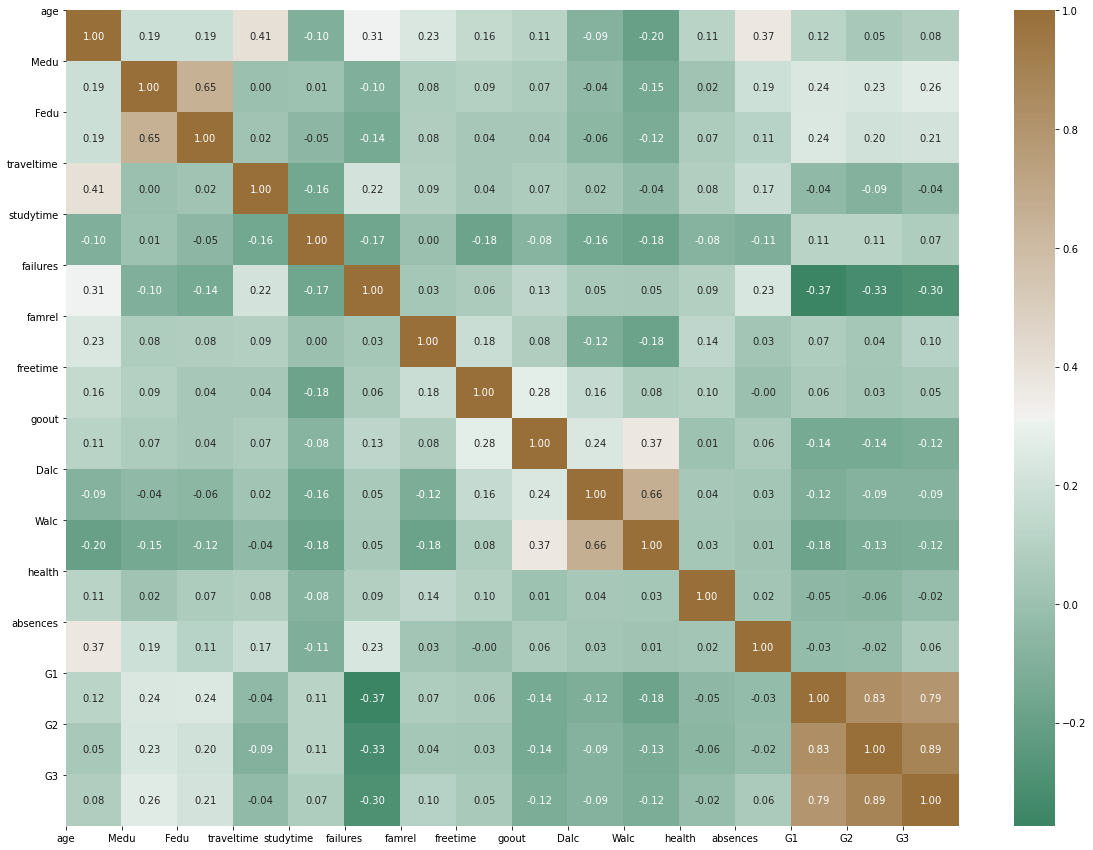

In [54]:
data = pd.read_csv(r'E:\project\FINAL\featurescombined.csv')

def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(150,50, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.savefig('Correlation.jpeg', bbox_inches='tight')
    plt.show()

correlation(data)

In [48]:
from sklearn import preprocessing
train1 = pd.read_csv(r'E:\project\FINAL\featurescombined.csv')
le=preprocessing.LabelEncoder()
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)

train1 = pd.get_dummies(train1)
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade'],axis=1)
train1.head()
#train1.columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,0,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,0,1,0,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train1,y,random_state=1,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)


(317, 75)
(317,)
(137, 75)
(137,)


In [50]:
model=XGBClassifier(learning_rate=0.1,n_estimators=100)

model.fit(x_train,y_train)
y_pred = model.predict(x_val)


In [51]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
#plot_confusion_matrix(model,x_val,y_val)
print(confusion_matrix(y_val,y_pred))


[[ 3  0  3  0  0]
 [ 0  8  0  4  0]
 [ 1  0 19  0  2]
 [ 0  1  0 36  4]
 [ 0  0  2  7 47]]


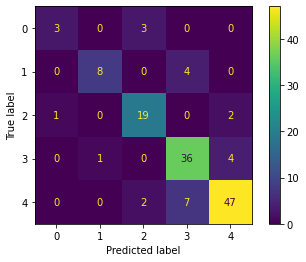

In [52]:
plot_confusion_matrix(model,x_val,y_val)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred, target_names=['Failure', 'Poor', 'Satisfactory','Good', 'Excellent']))
   

              precision    recall  f1-score   support

     Failure       0.75      0.50      0.60         6
        Poor       0.89      0.67      0.76        12
Satisfactory       0.79      0.86      0.83        22
        Good       0.77      0.88      0.82        41
   Excellent       0.89      0.84      0.86        56

    accuracy                           0.82       137
   macro avg       0.82      0.75      0.77       137
weighted avg       0.83      0.82      0.82       137



In [45]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, y_pred)

In [46]:
ac

0.8248175182481752